# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading datasets

In [2]:
train_df = pd.read_csv('./DataSets/creditcard.csv')
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train_df.shape

(284807, 31)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling null values

In [6]:
train_df.dropna(inplace=True)

In [7]:
train_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Here we can see that there are no null values in the dataset

### Checking the distribution of positive and nagetive classes

In [8]:
classes = train_df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [9]:
original_transaction = round((classes[0]/train_df['Class'].count()*100),2)
original_transaction

99.83

In [10]:
fraud_transaction = round((classes[1]/train_df['Class'].count()*100),2)
fraud_transaction

0.17

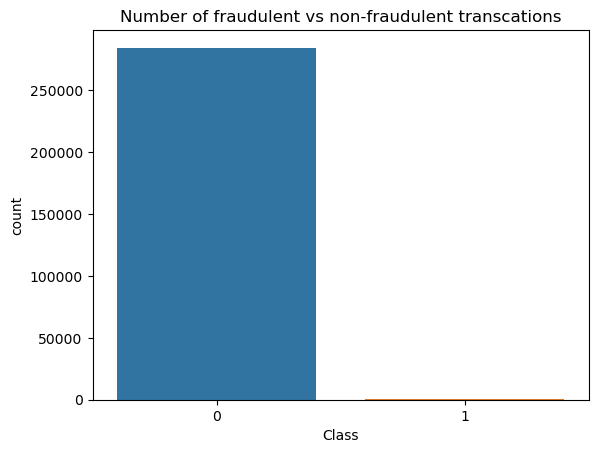

In [11]:
sns.countplot(x='Class', data=train_df)   # Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

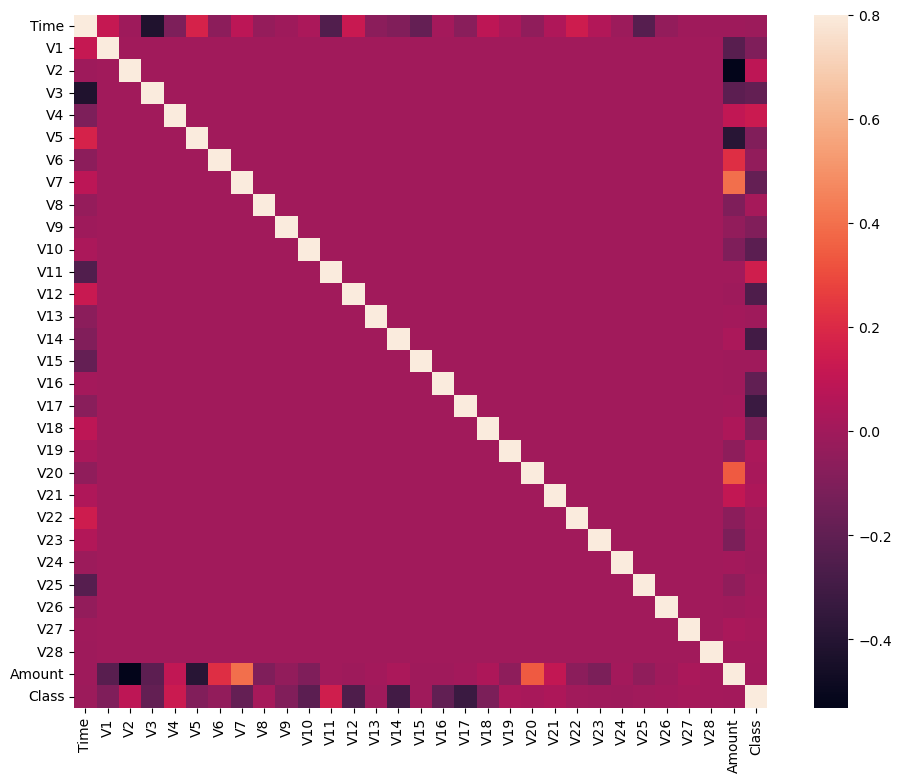

In [12]:
cormat=train_df.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax = .8 ,square=True)
plt.show()

### Observing the distribution of classes with 'time' feature

In [13]:
fraud_data = train_df[train_df['Class'] == 1]

authentic_data = train_df[train_df['Class'] == 0]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


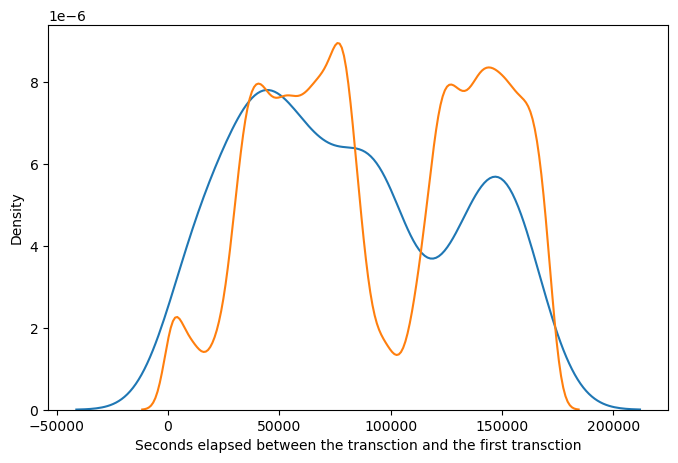

In [14]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Time'],label='fraudulent',hist=False)
ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Since there is no specific pattern of distribution with time, therefore this feature can be dropped

In [15]:
train_df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with 'amount' feature

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


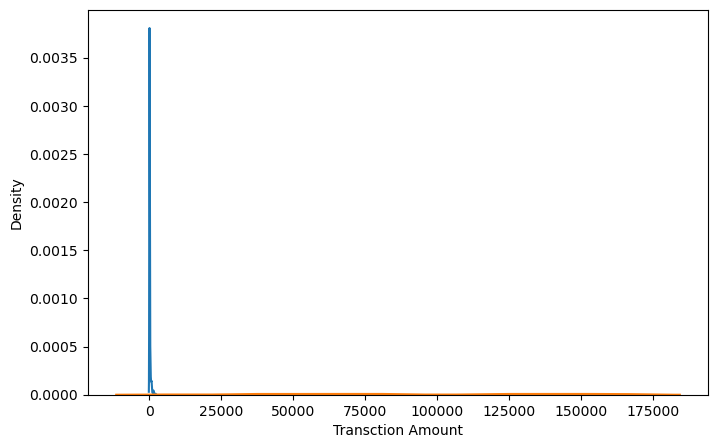

In [16]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(authentic_data['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

## Splitting the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = train_df.drop(['Class'], axis=1)
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [19]:
y = train_df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [21]:
X_train.shape

(227845, 29)

In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,0.77
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,36.14
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,179.95
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,181.06
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,8.20


In [23]:
y_train.shape

(227845,)

In [24]:
y_test.head()

49089     0
154704    0
67247     0
251657    0
201903    0
Name: Class, dtype: int64

Analysis - The fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

### Feature Scaling the 'Amount' column using Label Encoding

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,-0.711190,0.439833,0.963645,-1.558006,-0.849632,0.856514,-2.359232,-4.103076,-1.221692,-0.180773,...,0.467513,0.526395,0.555138,-0.715453,-0.339993,1.481497,0.221045,0.134007,0.163621,-0.152428
65615,-2.720797,-2.019693,0.555552,-1.214493,1.091755,-1.048706,-0.732389,0.670327,-1.697393,0.096623,...,-0.532981,-0.510275,-1.524682,0.777497,-0.343277,-0.660123,0.474666,-0.176144,-0.027094,-0.213504
253799,-1.825901,-0.539605,-0.263009,0.516277,-0.432071,0.097944,3.833402,-0.428094,-1.583814,-1.073811,...,1.260578,0.584132,0.544474,0.789313,0.017179,1.626030,-0.308673,-0.237096,0.072098,2.161475
210755,-0.360815,0.942995,0.256998,0.385238,0.606772,-0.806142,0.943830,-0.286445,0.049832,-0.082140,...,-0.389773,0.272937,0.861662,-0.125325,-0.021665,0.011629,-0.565085,-0.283593,0.017381,-0.340485


In [28]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Dealing with Skewness

Skewness is a quantifiable measure of how distorted a data sample is from the normal distribution. Any form of skewness is undesirable, since it leads to excessively large variance in estimates. 

In [29]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

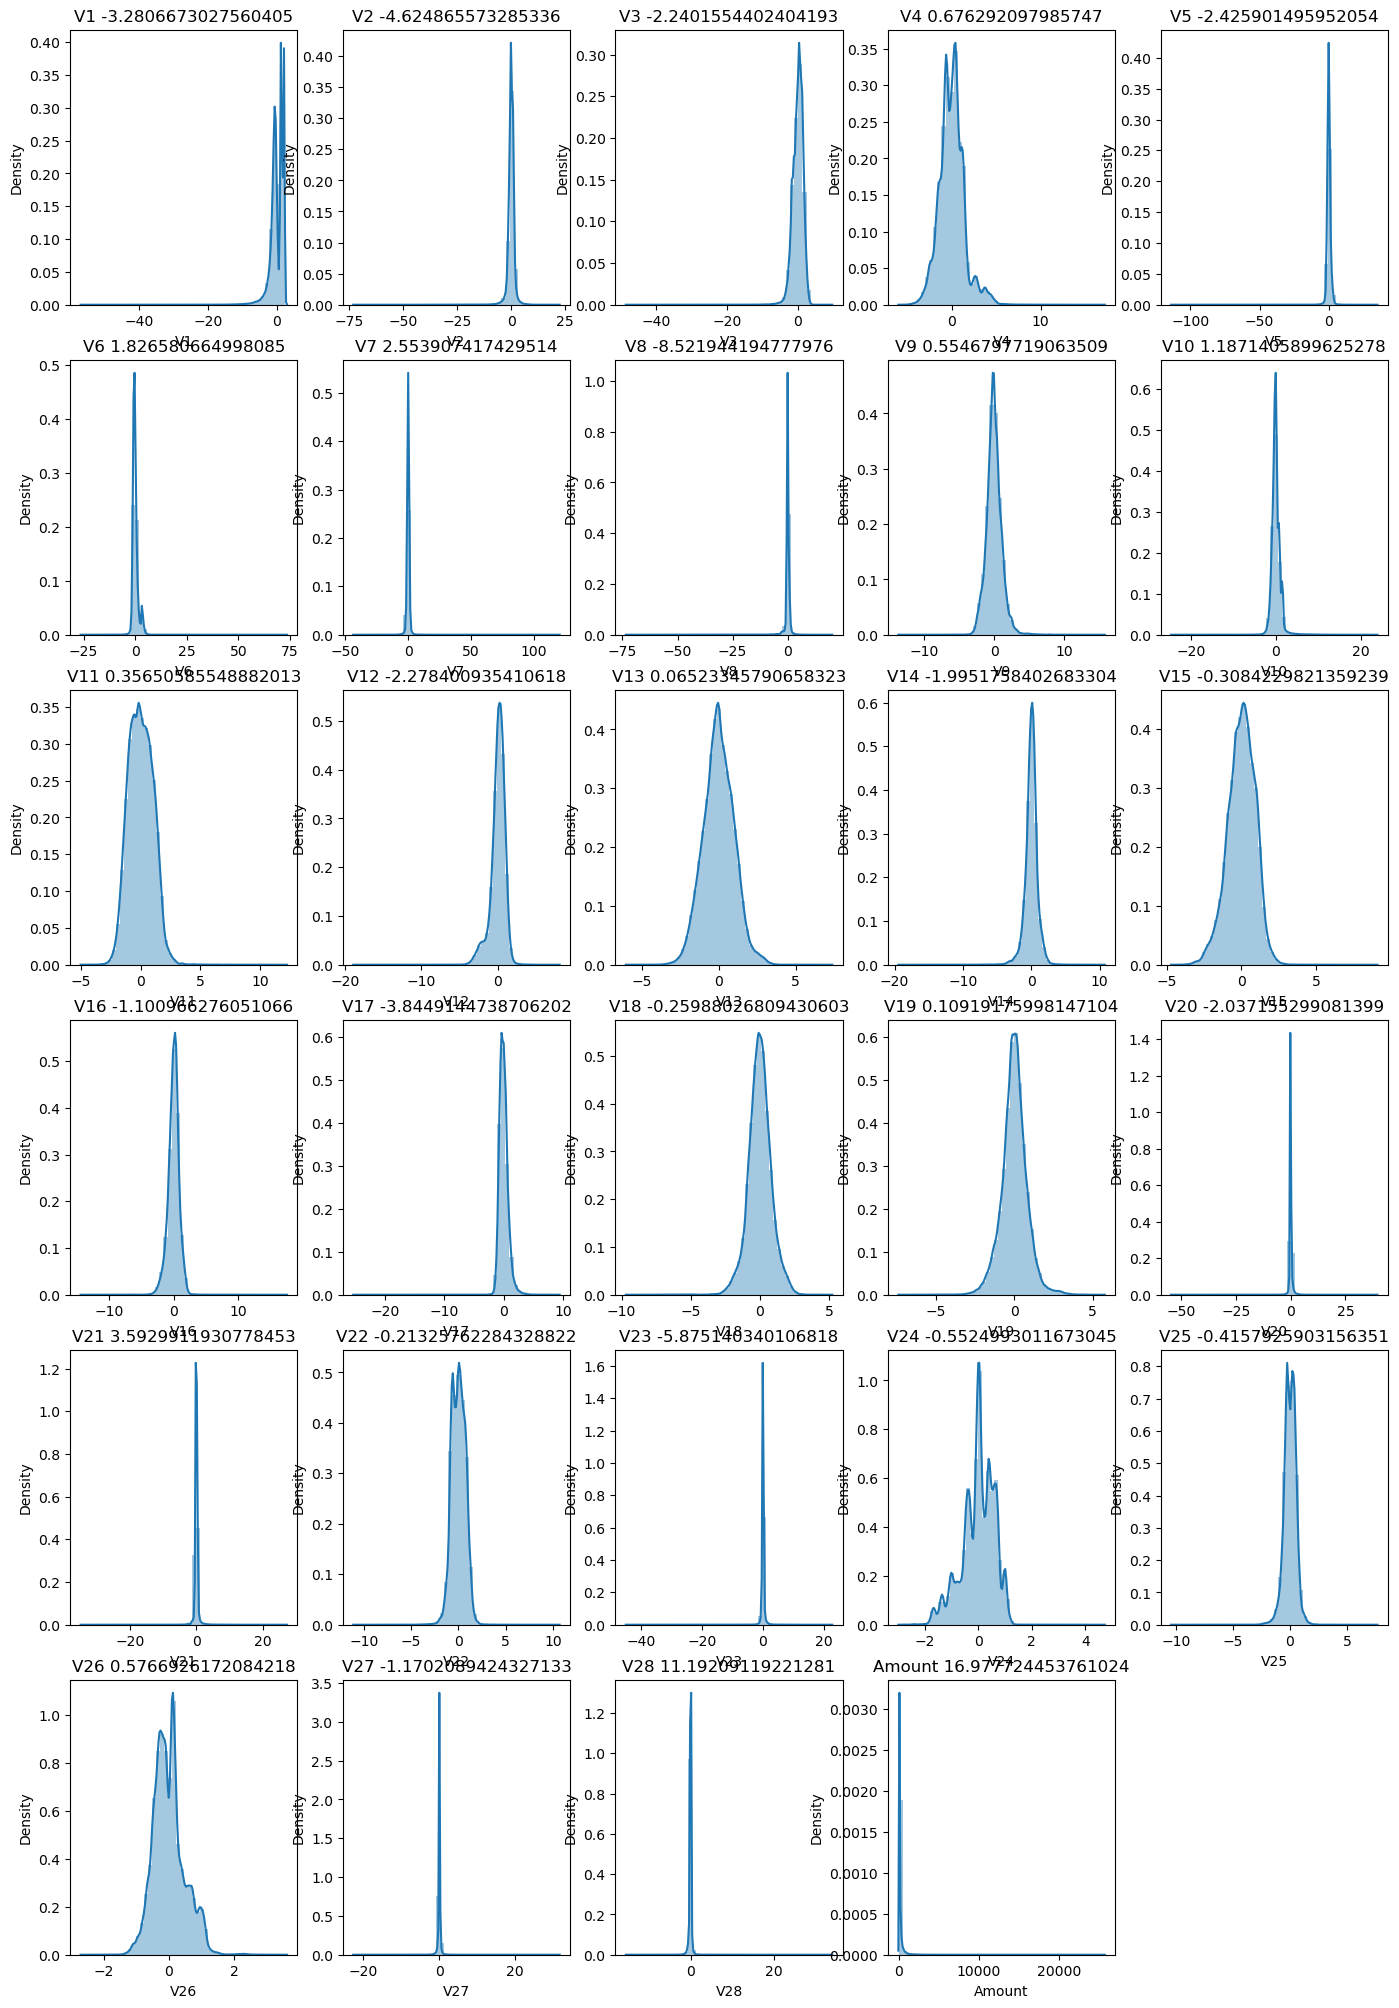

In [30]:
k=0
plt.figure(figsize=(17,25))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(train_df[col])
    plt.title(col+' '+str(train_df[col].skew()))

### Here we will be using the Power Transformer module of sklearn to change the distribution of the data


In [31]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

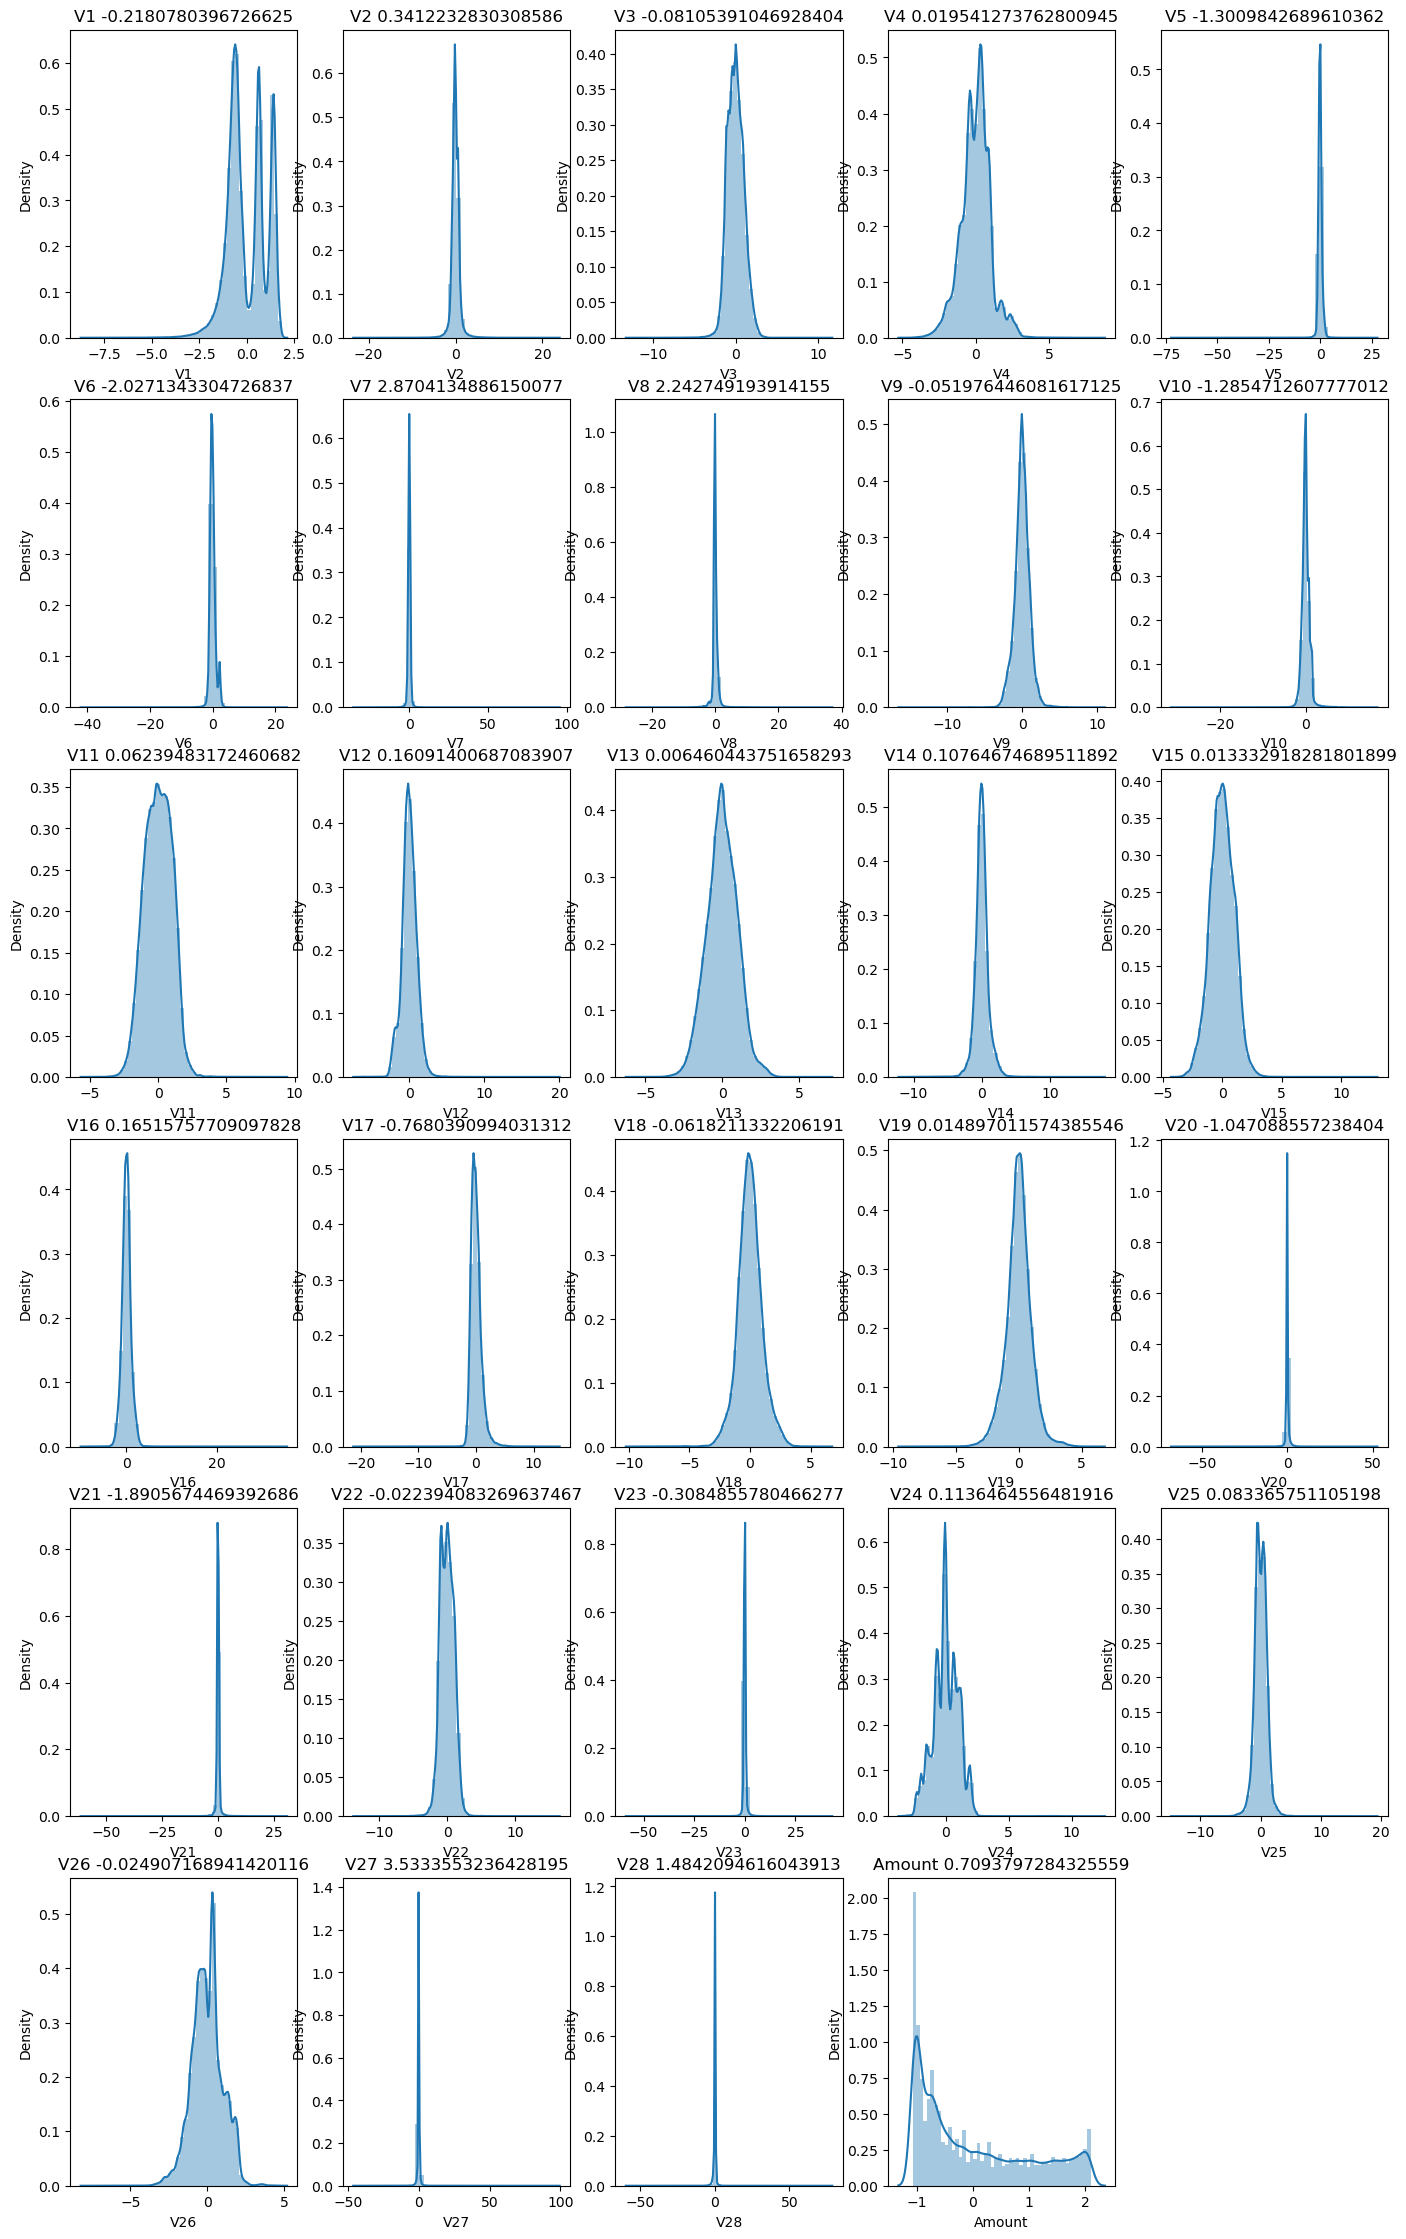

In [32]:
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [33]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,1.414341,-0.352037,-0.599219,-0.067550,-0.129205,0.326372,-0.541033,0.115625,1.025773,0.005709,...,-0.223245,-0.256588,-0.668354,0.543815,0.000923,-0.840953,-0.574979,-0.011227,-0.133703,-1.047231
179369,-0.343333,0.427569,0.256780,0.679871,0.243257,0.179406,0.503851,-0.125500,-0.649147,0.314539,...,0.263948,-0.156535,-0.378679,-0.188657,-0.776852,-0.981064,1.417840,-0.026888,0.459515,0.003533
73138,-1.474262,-1.175561,0.855950,0.569615,0.787904,-0.049687,-0.370444,0.923863,-0.529840,-0.907168,...,1.087460,0.396218,-0.454678,0.334451,-0.530882,0.437817,0.722656,-0.260684,-1.137282,1.580107
208679,1.241902,-0.686705,-1.042562,-0.081862,-0.419771,-1.002720,0.200703,-0.572151,-0.729926,0.745982,...,-0.255596,-0.557964,-1.230034,0.211300,0.029927,-0.499203,0.970393,-0.244245,-0.085740,1.584494
206534,1.636001,-0.424955,-1.004673,-0.627617,-0.300834,-1.209461,-0.095084,-0.493504,-0.633904,0.803305,...,-0.061150,0.087590,0.156477,0.338766,-0.233768,-0.160767,-0.599292,-0.117488,-0.186304,-0.791028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,-0.629084,0.214176,0.615004,-1.151621,-0.619547,0.727173,-1.898263,-3.085415,-1.145886,-0.129756,...,0.601080,0.736453,0.761310,-1.139853,-0.638310,3.124784,0.539173,0.324360,0.512942,0.309175
65615,-1.382569,-1.226421,0.266853,-0.864237,0.789267,-0.822236,-0.587450,0.634832,-1.644831,0.130868,...,-0.687451,-0.706989,-2.049155,1.271053,-0.643206,-1.248357,1.003895,-0.446251,-0.072121,-0.040323
253799,-1.080496,-0.417911,-0.335120,0.434676,-0.322521,0.186123,3.066862,-0.474847,-1.524427,-1.017297,...,1.630173,0.813850,0.746142,1.290916,-0.071073,3.458240,-0.602887,-0.595452,0.233604,2.043873
210755,-0.458810,0.580650,0.030901,0.346849,0.430919,-0.591137,0.757867,-0.347855,0.100208,-0.036084,...,-0.503775,0.393526,1.200123,-0.212248,-0.136562,-0.015481,-1.246695,-0.708830,0.065359,-1.003747


## Building different models on imbalanced data as following

Logistic Regression

Decsion Tree

Random Forest

XGBoost

### Metric evaluation for Imbalanced data in this dataset

Since the data is highly imbalanced the accuracy of every model will easily become 99% as majority of the datapoints return to a particular class(real transaction). Therefore here we will be using the ROC-AUC score to evaluate all the models. The ROC(Receiver Operator Characteristic) curve is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.  

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Performing Hyperparameter(C) tuning and cross validation

In [37]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)


params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}


model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [38]:
scores = pd.DataFrame(model_cv.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.845809,0.055449,0.021351,0.005739,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,...,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.020249,0.045099,0.018534,0.007117,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,...,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.121634,0.080994,0.021664,0.008053,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,...,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.195259,0.097475,0.018323,0.007878,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,...,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.117401,0.099489,0.018822,0.001769,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,...,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.096721,0.086172,0.021238,0.004806,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,...,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


##### Plotting Training and Testing loss

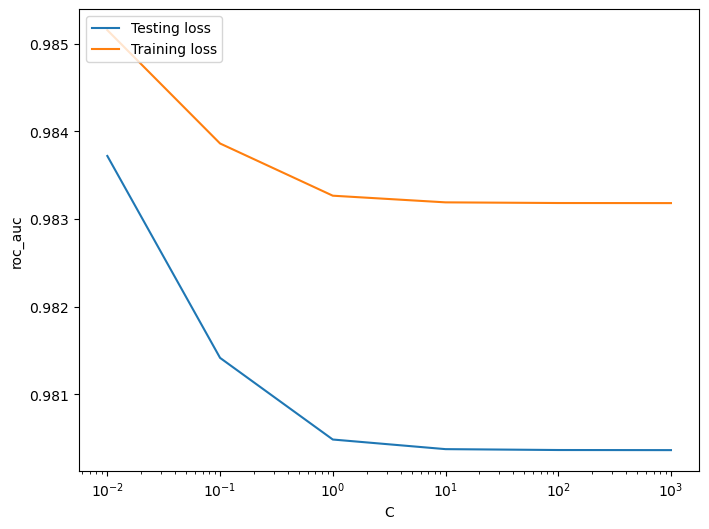

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(scores['param_C'], scores['mean_test_score'])
plt.plot(scores['param_C'], scores['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Testing loss', 'Training loss'], loc='upper left')
plt.xscale('log')

In [40]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test ROC_AUC score is {0} at C = {1}".format(best_score, best_C))

 The highest test ROC_AUC score is 0.9837192853831933 at C = 0.01


In [41]:
lg_C = LogisticRegression(C=0.01)

In [42]:
logistic_C_model = lg_C.fit(X_train, y_train)

#### Prediction on the train set

In [43]:
lg_train_preds = logistic_C_model.predict(X_train)

##### Confusion Matrix

In [44]:
confusion = metrics.confusion_matrix(y_train, lg_train_preds)
print(confusion)

[[227427     22]
 [   135    261]]


In [45]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [46]:
print("Accuracy:-",metrics.accuracy_score(y_train, lg_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train, lg_train_preds))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [47]:
print(classification_report(y_train, lg_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



#### ROC Curve function

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
lg_train_probabilities = logistic_C_model.predict_proba(X_train)[:,1]

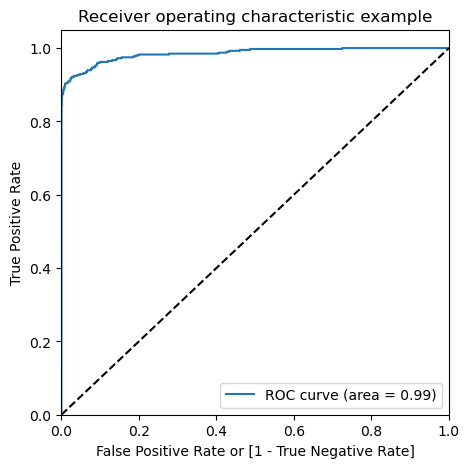

In [50]:
draw_roc(y_train, lg_train_probabilities)

##### ROC Training Score = 0.99

#### Prediction on the train set

In [51]:
lg_test_preds = logistic_C_model.predict(X_test)

In [52]:
confusion = metrics.confusion_matrix(y_test, lg_test_preds)
print(confusion)

[[56812    54]
 [   25    71]]


In [53]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [54]:
print("Accuracy:-",metrics.accuracy_score(y_test, lg_test_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_test, lg_test_preds))

Accuracy:- 0.9986131104947158
Sensitivity:- 0.7395833333333334
Specificity:- 0.9990503991840467
F1-Score:- 0.6425339366515836


##### Classification report

In [55]:
print(classification_report(y_test, lg_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.74      0.64        96

    accuracy                           1.00     56962
   macro avg       0.78      0.87      0.82     56962
weighted avg       1.00      1.00      1.00     56962



##### Calcuating Roc Score on test set

In [56]:
lg_test_probabilities = logistic_C_model.predict_proba(X_test)[:,1]

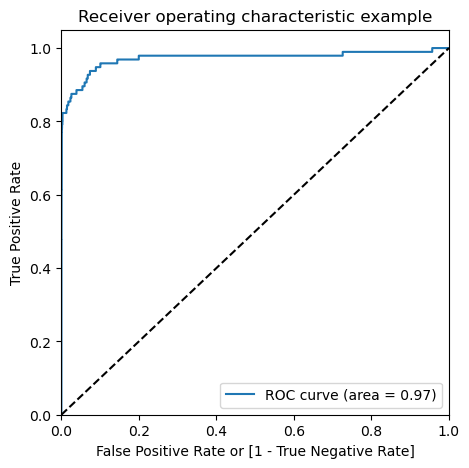

In [57]:
draw_roc(y_test, lg_test_probabilities)

##### ROC Testing Score = 0.97

#  XGBoost

In [58]:
from xgboost import XGBClassifier

#### Performing Hyperparameter tuning and cross validation

In [60]:
kfolds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds, 
                        verbose = 1,)

model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_le

In [62]:
scores = pd.DataFrame(model_cv.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.811351,0.144373,0.080468,0.000233,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1
1,15.382061,0.042825,0.088505,0.017041,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3
2,18.099879,0.122956,0.089052,0.021117,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2
3,10.623363,0.191685,0.085080,0.012081,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961152,0.974480,0.963067,0.966233,0.005884,6
4,14.479053,0.156540,0.088197,0.017046,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965527,0.983906,0.973348,0.007748,5
5,17.522106,0.601612,0.077351,0.008565,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4


##### Plotting Training and Testing scores

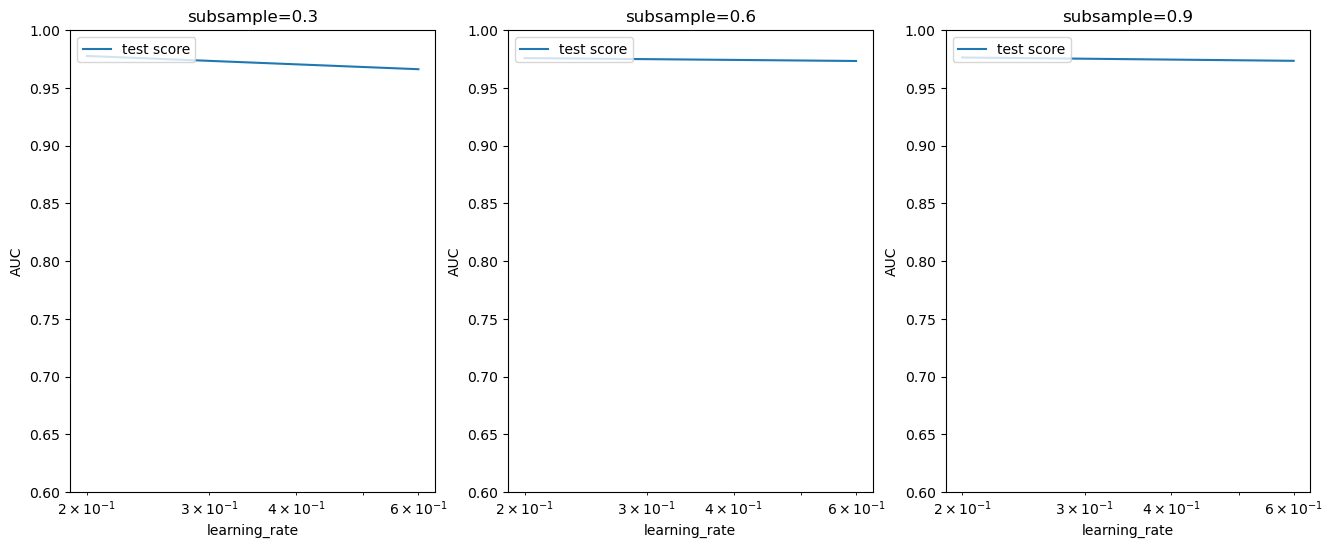

In [67]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = scores[scores['param_subsample']==subsample]
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score'], loc='upper left')
    plt.xscale('log')

In [72]:
best_params = model_cv.best_params_
best_params 

{'learning_rate': 0.2, 'subsample': 0.3}

In [73]:
tuned_xgb_model = XGBClassifier(**best_params )
tuned_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Prediction on the train set

In [75]:
xgb_train_preds = tuned_xgb_model.predict(X_train)

##### Confusion Matrix

In [76]:
confusion = metrics.confusion_matrix(y_train, xgb_train_preds)
print(confusion)

[[227449      0]
 [    40    356]]


In [77]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [78]:
print("Accuracy:-",metrics.accuracy_score(y_train, xgb_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train, xgb_train_preds))

Accuracy:- 0.9998244420549057
Sensitivity:- 0.898989898989899
Specificity:- 1.0
F1-Score:- 0.9468085106382979


##### Classification report

In [79]:
print(classification_report(y_train, xgb_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      0.90      0.95       396

    accuracy                           1.00    227845
   macro avg       1.00      0.95      0.97    227845
weighted avg       1.00      1.00      1.00    227845



#### Calcuating ROC Score on training set

In [80]:
xgb_train_probabilities = tuned_xgb_model.predict_proba(X_train)[:,1]

In [81]:
roc = metrics.roc_auc_score(y_train, xgb_train_probabilities)
roc

0.9999308425274247

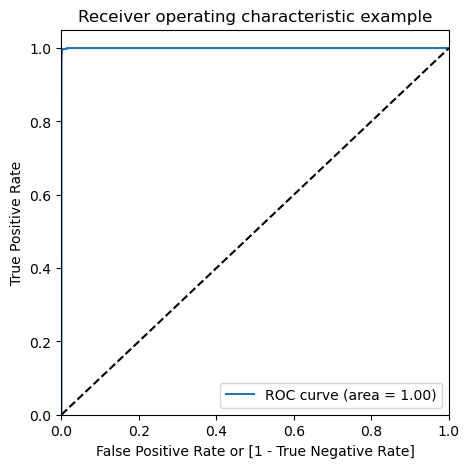

In [82]:
draw_roc(y_train, xgb_train_probabilities)

##### ROC Training Score = 1.00

#### Prediction on the train set

In [83]:
xgb_test_preds = tuned_xgb_model.predict(X_test)

In [84]:
confusion = metrics.confusion_matrix(y_test, xgb_test_preds)
print(confusion)

[[56842    24]
 [   23    73]]


In [85]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [86]:
print("Accuracy:-",metrics.accuracy_score(y_test, xgb_test_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_test, xgb_test_preds))

Accuracy:- 0.9991748885221726
Sensitivity:- 0.7604166666666666
Specificity:- 0.9995779551929096
F1-Score:- 0.7564766839378239


##### Classification report

In [87]:
print(classification_report(y_test, xgb_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.75      0.76      0.76        96

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



##### Calcuating Roc Score on test set

In [88]:
xgb_test_probabilities = tuned_xgb_model.predict_proba(X_test)[:,1]

In [89]:
roc = metrics.roc_auc_score(y_test, xgb_test_probabilities)
roc

0.9639668255196427

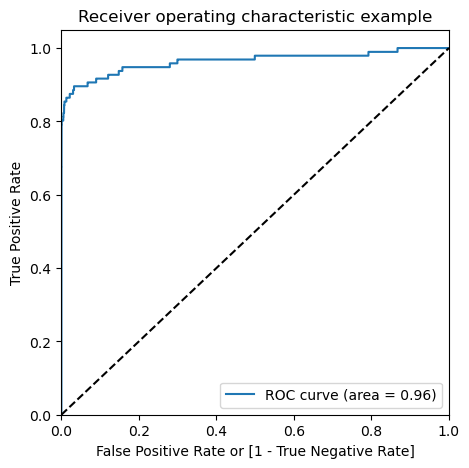

In [90]:
draw_roc(y_test, xgb_test_probabilities)

##### ROC Testing Score = 0.97

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

#### Performing Hyperparameter tuning and cross validation

In [92]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [93]:
scores = pd.DataFrame(model_cv.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.811351,0.144373,0.080468,0.000233,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1
1,15.382061,0.042825,0.088505,0.017041,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3
2,18.099879,0.122956,0.089052,0.021117,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2
3,10.623363,0.191685,0.085080,0.012081,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961152,0.974480,0.963067,0.966233,0.005884,6
4,14.479053,0.156540,0.088197,0.017046,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965527,0.983906,0.973348,0.007748,5
5,17.522106,0.601612,0.077351,0.008565,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4


In [94]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


##### Using Gini Index to measure degree of randomness

In [95]:
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [96]:
dt_train_preds = dt_model.predict(X_train)

##### Confusion Matrix

In [97]:
confusion = metrics.confusion_matrix(y_train, dt_train_preds)
print(confusion)

[[227374     75]
 [   114    282]]


In [98]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [99]:
print("Accuracy:-",metrics.accuracy_score(y_train, dt_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train, dt_train_preds))

Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405
F1-Score:- 0.7490039840637449


##### Classification report

In [100]:
print(classification_report(y_train, dt_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



#### Calcuating ROC Score on training set

In [101]:
dt_train_probabilities = dt_model.predict_proba(X_train)[:,1]

In [102]:
roc = metrics.roc_auc_score(y_train, dt_train_probabilities)
roc

0.9534547393930157

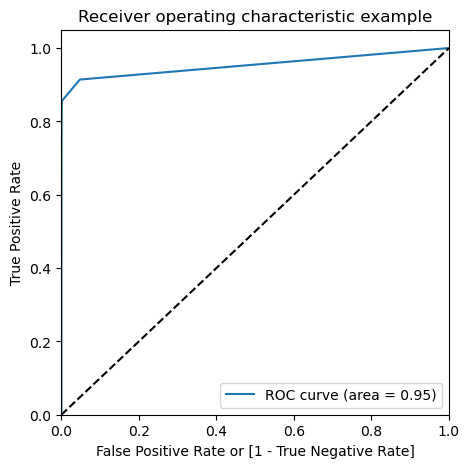

In [103]:
draw_roc(y_train, dt_train_probabilities)

##### ROC Training Score = 0.95

#### Prediction on the train set

In [104]:
dt_test_preds = dt_model.predict(X_test)

In [105]:
confusion = metrics.confusion_matrix(y_test, dt_test_preds)
print(confusion)

[[56836    30]
 [   40    56]]


In [106]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [107]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, dt_test_preds))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, dt_train_preds))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


##### Classification report

In [108]:
print(classification_report(y_test, dt_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



##### Calcuating Roc Score on test set

In [109]:
dt_test_probabilities = dt_model.predict_proba(X_test)[:,1]

In [110]:
roc = metrics.roc_auc_score(y_test, dt_test_probabilities)
roc

0.9394035063423954

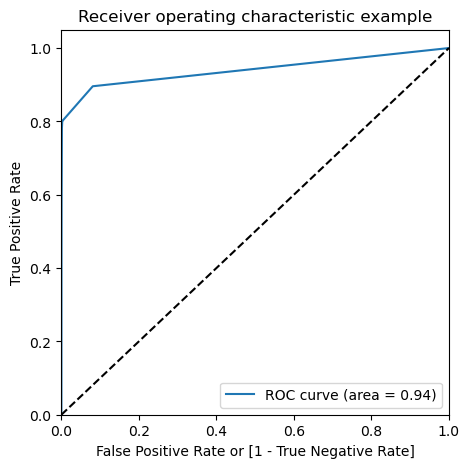

In [111]:
draw_roc(y_test, dt_test_probabilities)

##### ROC Testing Score = 0.94

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

#### Performing Hyperparameter tuning and cross validation

In [114]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [115]:
print('ROC Score:',grid_search.best_score_,'using', grid_search.best_params_)
rf_bestparams = grid_search.best_params_

ROC Score: 0.9992933790976162 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [116]:
tuned_rf_model = RandomForestClassifier(**rf_bestparams)
tuned_rf_model

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)

#### Prediction on the train set

In [117]:
tuned_rf_model.fit(X_train, y_train)
rf_train_preds = tuned_rf_model.predict(X_train)

##### Confusion Matrix

In [118]:
confusion = metrics.confusion_matrix(y_train, rf_train_preds)
print(confusion)

[[227408     41]
 [   101    295]]


In [119]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [120]:
print("Accuracy:-",metrics.accuracy_score(y_train, rf_train_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train, rf_train_preds))

Accuracy:- 0.9993767692949154
Sensitivity:- 0.7449494949494949
Specificity:- 0.9998197398098035
F1-Score:- 0.8060109289617485


##### Classification report

In [121]:
print(classification_report(y_train, rf_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.74      0.81       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



#### Calcuating ROC Score on training set

In [122]:
rf_train_probabilities = tuned_rf_model.predict_proba(X_train)[:,1]
roc = metrics.roc_auc_score(y_train, rf_train_probabilities)
roc

0.9801159054370764

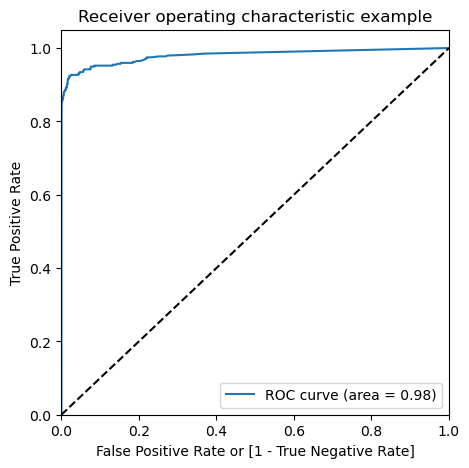

In [123]:
draw_roc(y_train, rf_train_probabilities)

##### ROC Training Score = 0.98

#### Prediction on the test set

In [124]:
rf_test_preds = tuned_rf_model.predict(X_test)


##### Confusion Matrix

In [125]:
confusion = metrics.confusion_matrix(y_test, rf_test_preds)
print(confusion)

[[56840    26]
 [   29    67]]


In [126]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [127]:
print("Accuracy:-",metrics.accuracy_score(y_test, rf_test_preds))

print("Sensitivity:-",TP / float(TP+FN))

print("Specificity:-", TN / float(TN+FP))

print("F1-Score:-", f1_score(y_train, rf_train_preds))

Accuracy:- 0.9990344440153085
Sensitivity:- 0.6979166666666666
Specificity:- 0.9995427847923188
F1-Score:- 0.8060109289617485


##### Classification report 

In [128]:
print(classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.70      0.71        96

    accuracy                           1.00     56962
   macro avg       0.86      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



##### Calcuating Roc Score on test set

In [129]:
rf_test_probabilities = tuned_rf_model.predict_proba(X_test)[:,1]
roc = metrics.roc_auc_score(y_test, rf_test_probabilities)
roc

0.9523207518552386

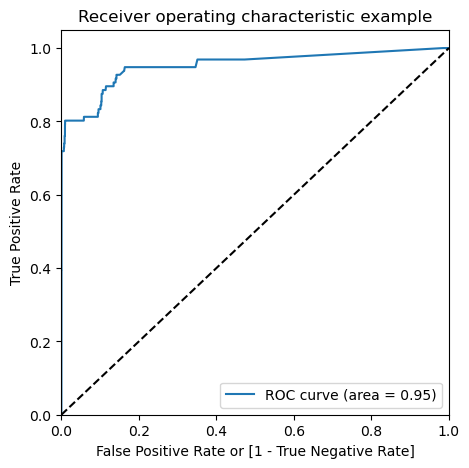

In [130]:
draw_roc(y_test, rf_test_probabilities)

##### ROC Testing Score = 0.95

## Here we can see that all the models have performed well with the ROc Auc Score ranging within 0.90 to 1.00. But the Logistic Regression and XGBoost have performed better that the other classifiers with a RUC Score of 0.97.

 ### However this analysis has been done on a highly imbalanced data and we can try some approaches to handle this imbalance.

## Visualization of the imbalanced dataset

Top var = 17
2nd Top var = 12
3rd Top var = 14


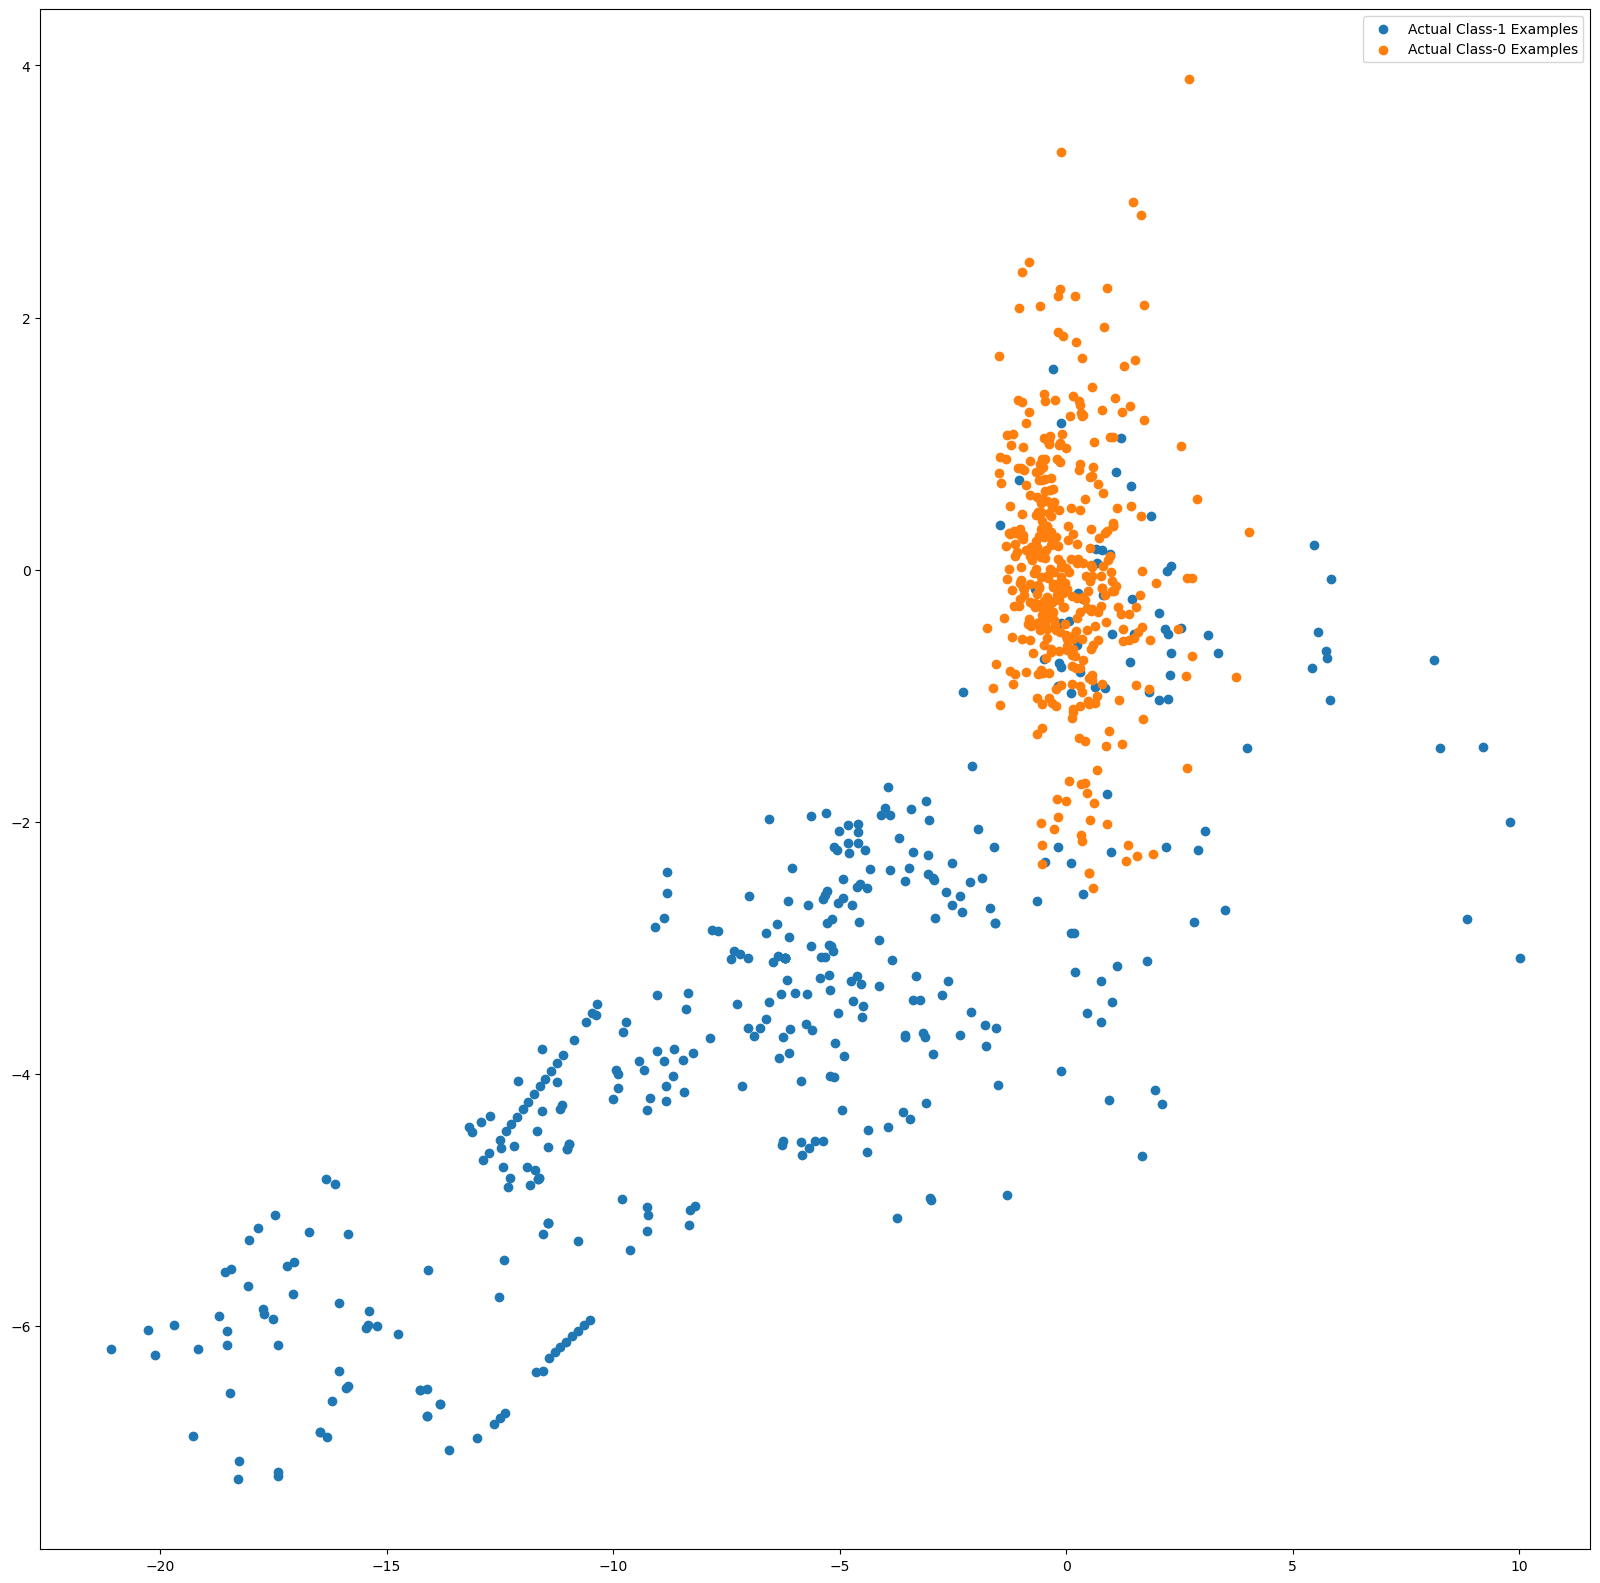

In [131]:
# Features of XGBoost model

var_imp = []
for i in tuned_xgb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(tuned_xgb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(tuned_xgb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(tuned_xgb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(tuned_xgb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(tuned_xgb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()